In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pre_season = pd.read_csv("Pre_Season_Batter.csv")
pre_season['position'] = pre_season['position'].str.replace(r"\(.*\)","")
pre_season.loc[(pre_season['position'] == '내야수')]
pre_season.loc[(pre_season['position'] == '외야수')]
pre_season.loc[(pre_season['position'] == '포수')]
pre_season

# height weight 나누기  # year_born을 나이 계산
# position 우투우타 지우고 내야수/외야수/포수로만 구분





C:\Users\cho\AppData\Local\Temp\ipykernel_21140\3302772820.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pre_season['position'] = pre_season['position'].str.replace(r"\(.*\)","")


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833


In [16]:
# 'height/weight' 열을 '/'를 기준으로 나누고, 각각 'height'와 'weight' 열로 저장
pre_season[['height', 'weight']] = pre_season['height/weight'].str.split('/', expand=True)


# 'height'와 'weight' 열의 값을 숫자로 변환
pre_season['height'] = pd.to_numeric(pre_season['height'].str.extract('(\d+)')[0])
pre_season['weight'] = pd.to_numeric(pre_season['weight'].str.extract('(\d+)')[0])

# BMI 계산 및 소수 둘째 자리까지 반올림
pre_season['BMI'] = pre_season['weight'] / ((pre_season['height'] / 100) ** 2)
pre_season['BMI'] = pre_season['BMI'].round(1)

# 'year_born' 열을 날짜 형식으로 변환
pre_season['year_born'] = pd.to_datetime(pre_season['year_born'], format='%Y년 %m월 %d일')

# 'year'와 'year_born'을 사용하여 'age' 열 생성
pre_season['age'] = pre_season['year'] - pre_season['year_born'].dt.year + 1

pre_season

C:\Users\cho\AppData\Local\Temp\ipykernel_21140\1854780531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_season[['height', 'weight']] = pre_season['height/weight'].str.split('/', expand=True)
C:\Users\cho\AppData\Local\Temp\ipykernel_21140\1854780531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_season['height'] = pd.to_numeric(pre_season['height'].str.extract('(\d+)')[0])
C:\Users\cho\AppData\Local\Temp\ipykernel_21140\1854780531.py:7: SettingWithCopyWarning: 
A value is trying to be se

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,height,weight,BMI,age
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,177cm/93kg,1985-04-12,내야수,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,177,93,29.7,34
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.500,180,72,22.2,20
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.416,180,72,22.2,24
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.493,180,72,22.2,25
5,1,강경학,2017,한화,0.222,11,36,10,8,0,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.671,180,72,22.2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,183cm/96kg,1987-07-28,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,183,96,28.7,28
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,183cm/96kg,1987-07-28,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,183,96,28.7,29
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,183cm/96kg,1987-07-28,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,183,96,28.7,30
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,183cm/96kg,1987-07-28,내야수,사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,183,96,28.7,32


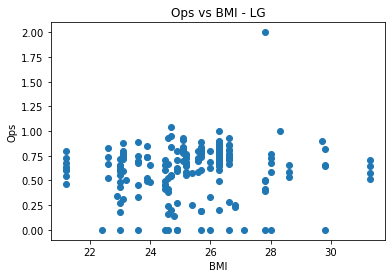

Ops와 BMI 간의 상관 관계 (LG): 0.09


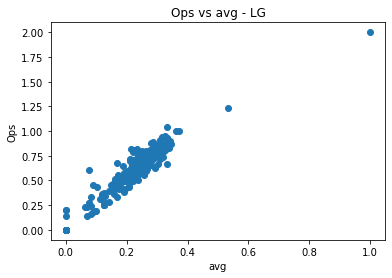

Ops와 avg 간의 상관 관계 (LG): 0.95


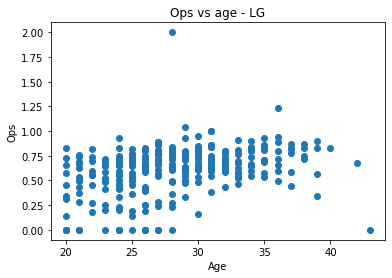

Ops와 Age 간의 상관 관계 (LG): 0.35


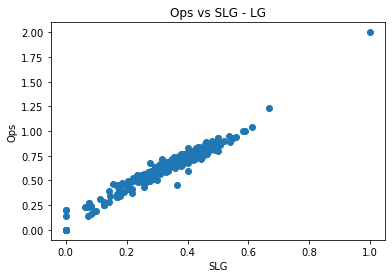

Ops와 SLG 간의 상관 관계 (LG): 0.98


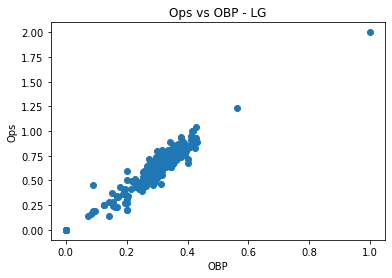

Ops와 OBP 간의 상관 관계 (LG): 0.96


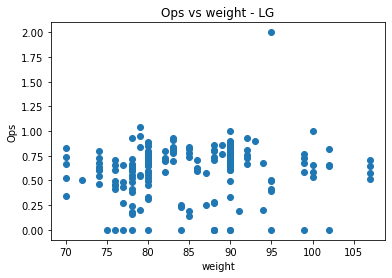

Ops와 weight 간의 상관 관계 (LG): 0.11


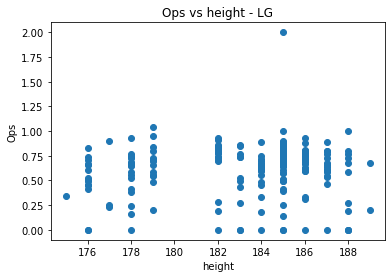

Ops와 height 간의 상관 관계 (LG): 0.09


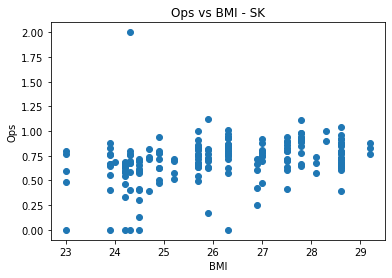

Ops와 BMI 간의 상관 관계 (SK): 0.33


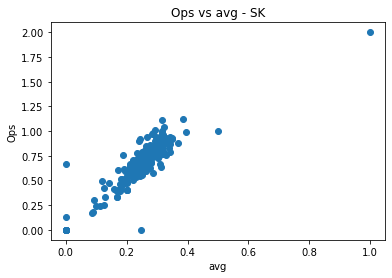

Ops와 avg 간의 상관 관계 (SK): 0.88


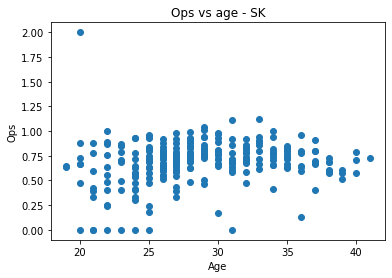

Ops와 Age 간의 상관 관계 (SK): 0.18


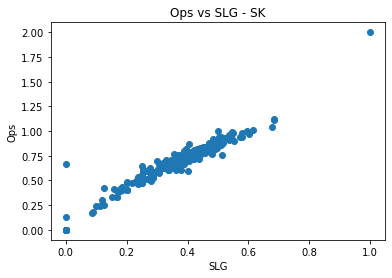

Ops와 SLG 간의 상관 관계 (SK): 0.96


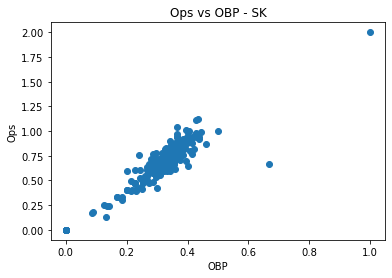

Ops와 OBP 간의 상관 관계 (SK): 0.92


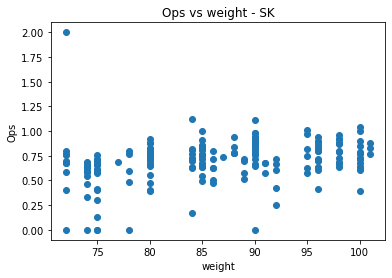

Ops와 weight 간의 상관 관계 (SK): 0.30


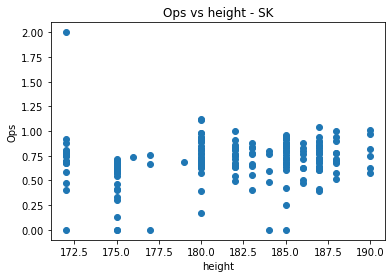

Ops와 height 간의 상관 관계 (SK): 0.17


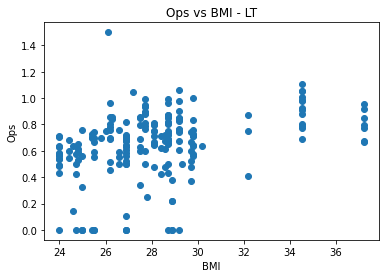

Ops와 BMI 간의 상관 관계 (LT): 0.36


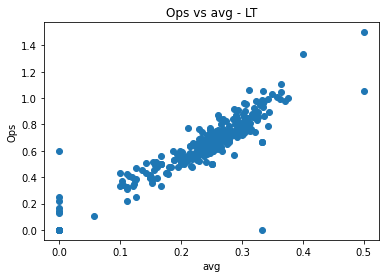

Ops와 avg 간의 상관 관계 (LT): 0.92


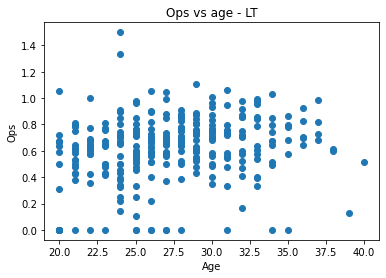

Ops와 Age 간의 상관 관계 (LT): 0.20


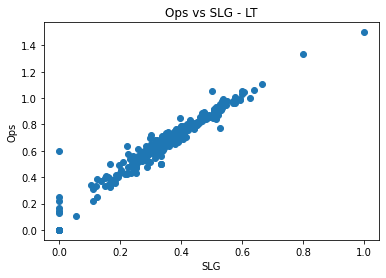

Ops와 SLG 간의 상관 관계 (LT): 0.97


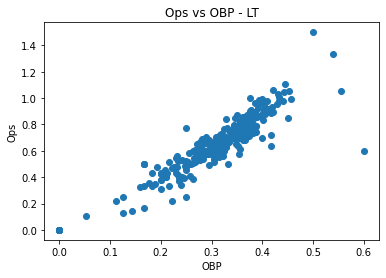

Ops와 OBP 간의 상관 관계 (LT): 0.94


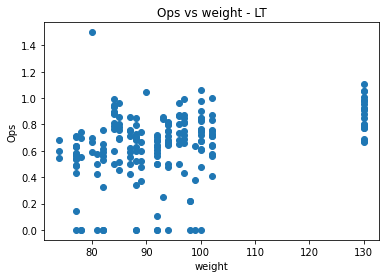

Ops와 weight 간의 상관 관계 (LT): 0.34


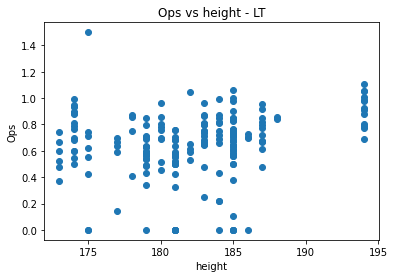

Ops와 height 간의 상관 관계 (LT): 0.19


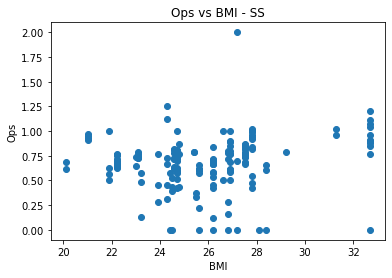

Ops와 BMI 간의 상관 관계 (SS): 0.17


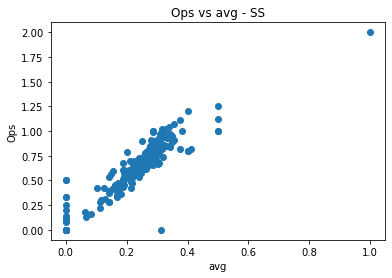

Ops와 avg 간의 상관 관계 (SS): 0.91


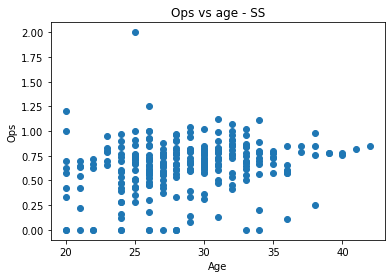

Ops와 Age 간의 상관 관계 (SS): 0.21


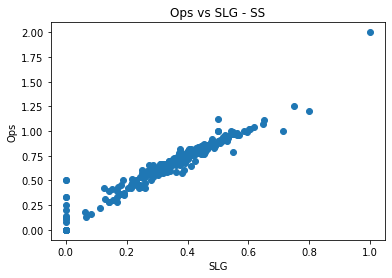

Ops와 SLG 간의 상관 관계 (SS): 0.96


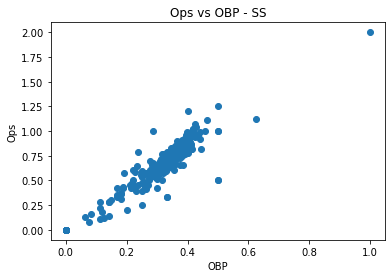

Ops와 OBP 간의 상관 관계 (SS): 0.93


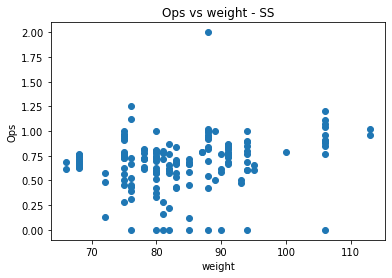

Ops와 weight 간의 상관 관계 (SS): 0.23


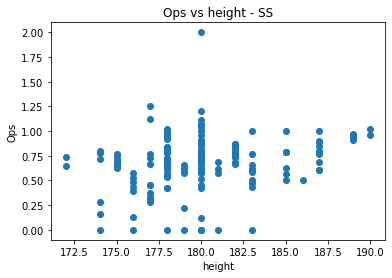

Ops와 height 간의 상관 관계 (SS): 0.24


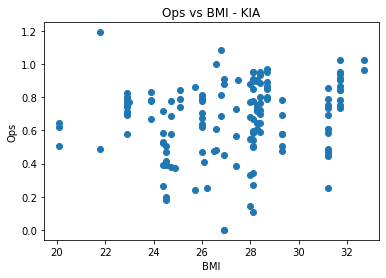

Ops와 BMI 간의 상관 관계 (KIA): 0.18


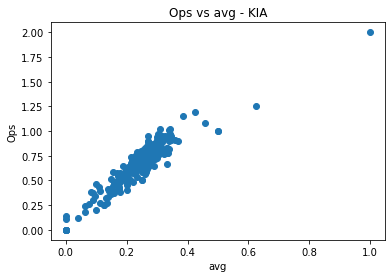

Ops와 avg 간의 상관 관계 (KIA): 0.93


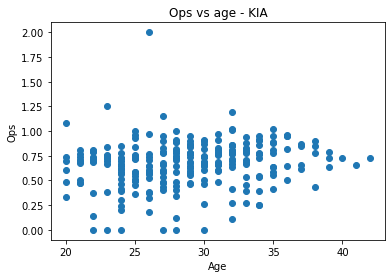

Ops와 Age 간의 상관 관계 (KIA): 0.17


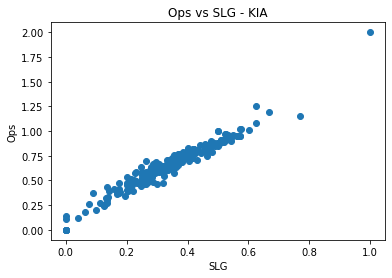

Ops와 SLG 간의 상관 관계 (KIA): 0.97


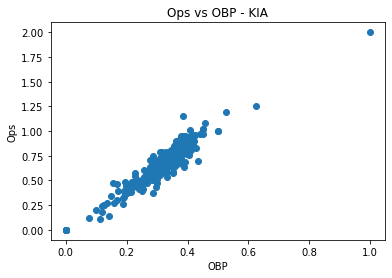

Ops와 OBP 간의 상관 관계 (KIA): 0.95


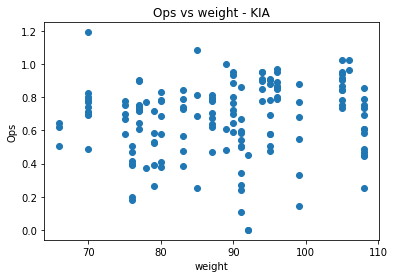

Ops와 weight 간의 상관 관계 (KIA): 0.13


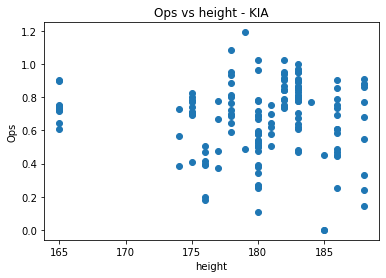

Ops와 height 간의 상관 관계 (KIA): -0.03


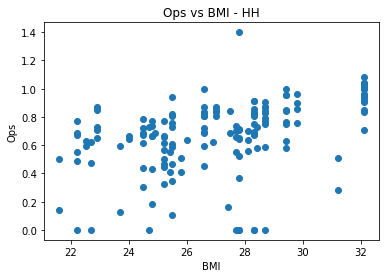

Ops와 BMI 간의 상관 관계 (HH): 0.41


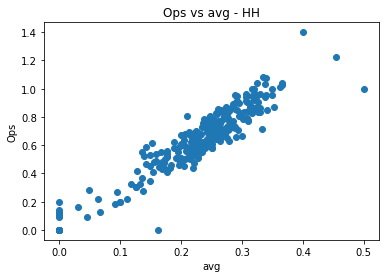

Ops와 avg 간의 상관 관계 (HH): 0.95


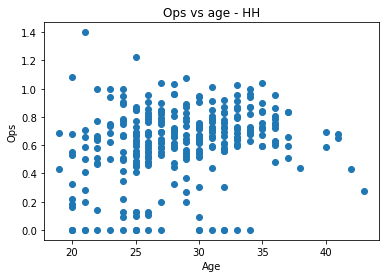

Ops와 Age 간의 상관 관계 (HH): 0.24


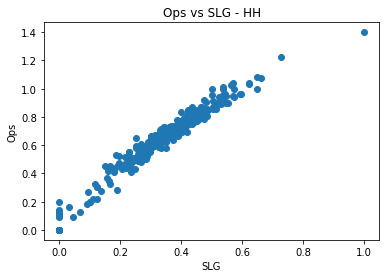

Ops와 SLG 간의 상관 관계 (HH): 0.98


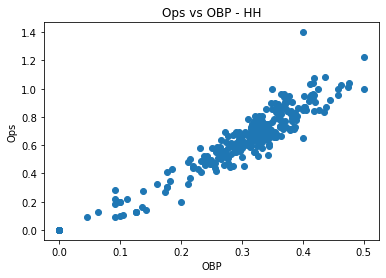

Ops와 OBP 간의 상관 관계 (HH): 0.95


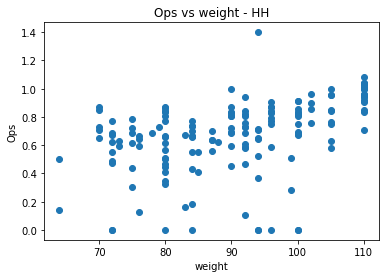

Ops와 weight 간의 상관 관계 (HH): 0.41


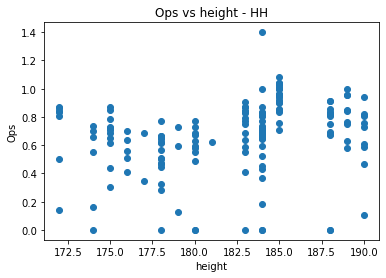

Ops와 height 간의 상관 관계 (HH): 0.25


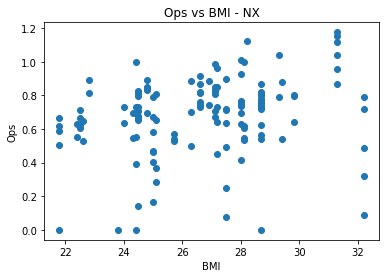

Ops와 BMI 간의 상관 관계 (NX): 0.24


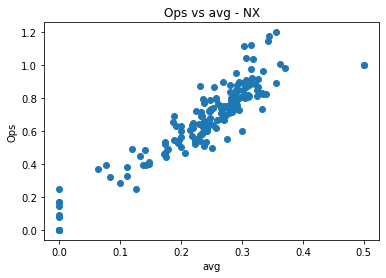

Ops와 avg 간의 상관 관계 (NX): 0.91


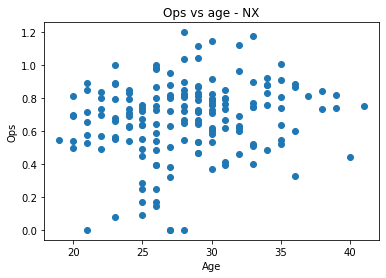

Ops와 Age 간의 상관 관계 (NX): 0.17


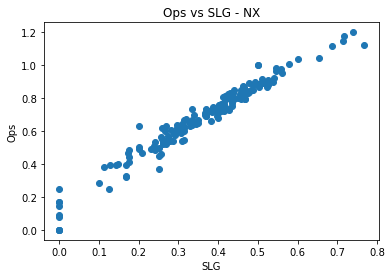

Ops와 SLG 간의 상관 관계 (NX): 0.98


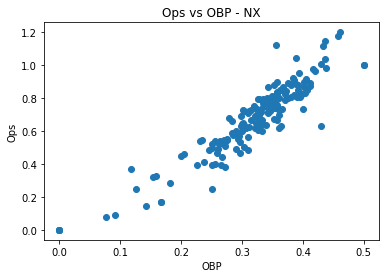

Ops와 OBP 간의 상관 관계 (NX): 0.93


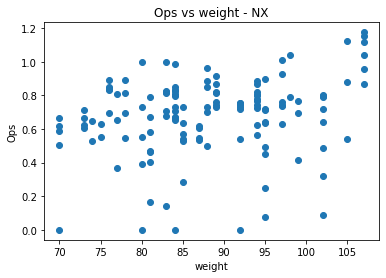

Ops와 weight 간의 상관 관계 (NX): 0.25


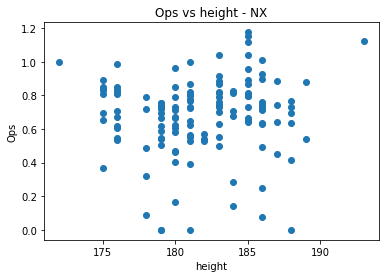

Ops와 height 간의 상관 관계 (NX): 0.08


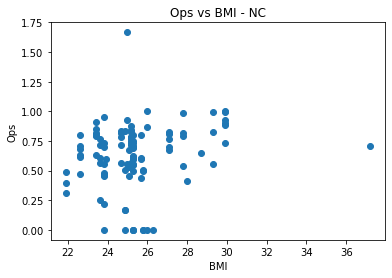

Ops와 BMI 간의 상관 관계 (NC): 0.20


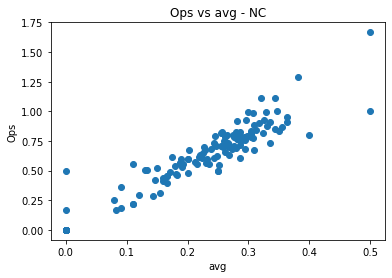

Ops와 avg 간의 상관 관계 (NC): 0.93


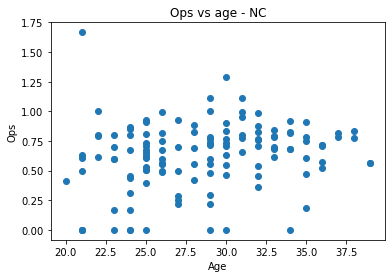

Ops와 Age 간의 상관 관계 (NC): 0.20


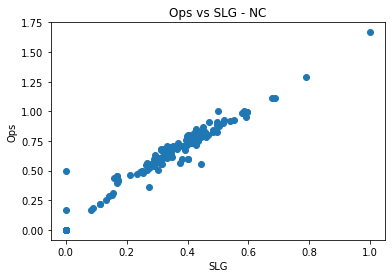

Ops와 SLG 간의 상관 관계 (NC): 0.97


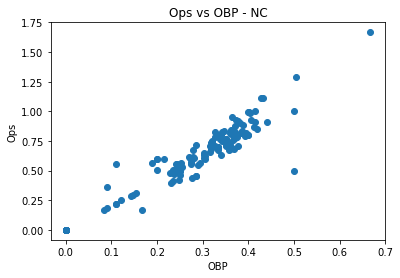

Ops와 OBP 간의 상관 관계 (NC): 0.94


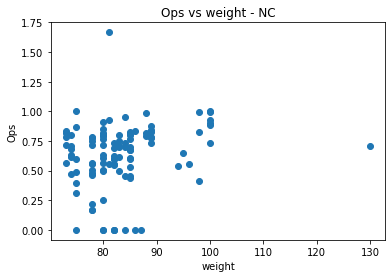

Ops와 weight 간의 상관 관계 (NC): 0.20


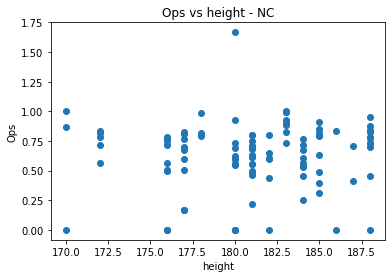

Ops와 height 간의 상관 관계 (NC): 0.05


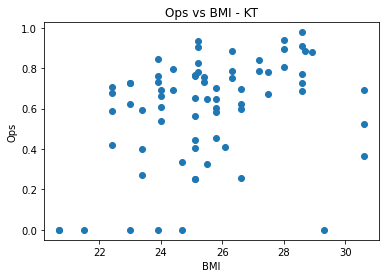

Ops와 BMI 간의 상관 관계 (KT): 0.37


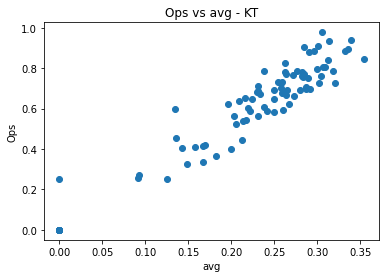

Ops와 avg 간의 상관 관계 (KT): 0.95


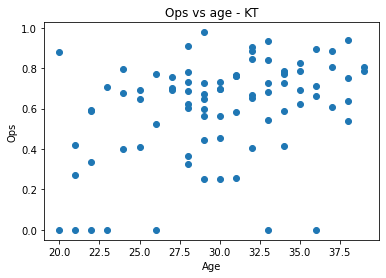

Ops와 Age 간의 상관 관계 (KT): 0.39


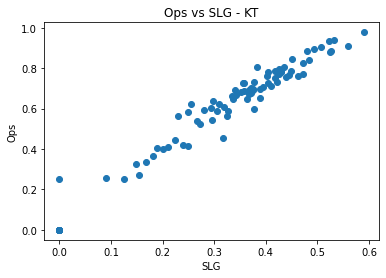

Ops와 SLG 간의 상관 관계 (KT): 0.98


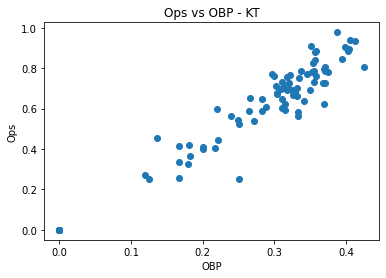

Ops와 OBP 간의 상관 관계 (KT): 0.96


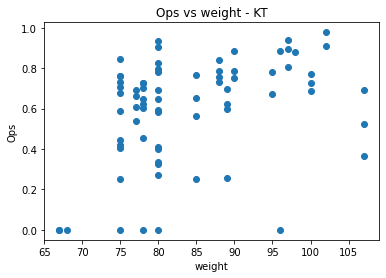

Ops와 weight 간의 상관 관계 (KT): 0.38


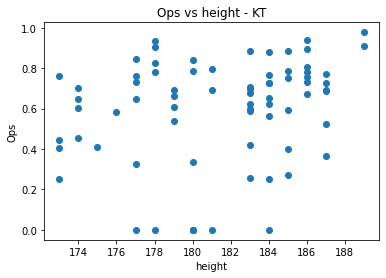

Ops와 height 간의 상관 관계 (KT): 0.24


In [34]:
teams_L = [LG_regular, SK_regular, LT_regular, SS_regular, KIA_regular, HH_regular, NX_regular, NC_regular, KT_regular]
team_names = ['LG', 'SK', 'LT', 'SS', 'KIA', 'HH', 'NX', 'NC', 'KT']

for team, team_name in zip(teams_L, team_names):
    correlation_ops_bmi = team[['OPS', 'BMI']].corr().iloc[0, 1]
    plt.scatter(team['BMI'], team['OPS'])
    plt.title(f'Ops vs BMI - {team_name}')
    plt.xlabel('BMI')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 BMI 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')
    
    correlation_ops_bmi = team[['OPS', 'avg']].corr().iloc[0, 1]
    plt.scatter(team['avg'], team['OPS'])
    plt.title(f'Ops vs avg - {team_name}')
    plt.xlabel('avg')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 avg 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')
    
    correlation_ops_bmi = team[['OPS', 'age']].corr().iloc[0, 1]
    plt.scatter(team['age'], team['OPS'])
    plt.title(f'Ops vs age - {team_name}')
    plt.xlabel('Age')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 Age 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')

    correlation_ops_bmi = team[['OPS', 'SLG']].corr().iloc[0, 1]
    plt.scatter(team['SLG'], team['OPS'])
    plt.title(f'Ops vs SLG - {team_name}')
    plt.xlabel('SLG')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 SLG 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')

    correlation_ops_bmi = team[['OPS', 'OBP']].corr().iloc[0, 1]
    plt.scatter(team['OBP'], team['OPS'])
    plt.title(f'Ops vs OBP - {team_name}')
    plt.xlabel('OBP')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 OBP 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')    
    
    correlation_ops_bmi = team[['OPS', 'weight']].corr().iloc[0, 1]
    plt.scatter(team['weight'], team['OPS'])
    plt.title(f'Ops vs weight - {team_name}')
    plt.xlabel('weight')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 weight 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')   
    
    correlation_ops_bmi = team[['OPS', 'height']].corr().iloc[0, 1]
    plt.scatter(team['height'], team['OPS'])
    plt.title(f'Ops vs height - {team_name}')
    plt.xlabel('height')
    plt.ylabel('Ops')
    plt.show()
    print(f'Ops와 height 간의 상관 관계 ({team_name}): {correlation_ops_bmi:.2f}')   
    
    

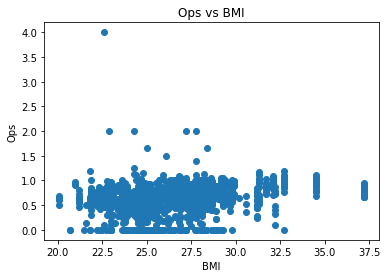

Ops와 BMI 간의 상관 관계: 0.20


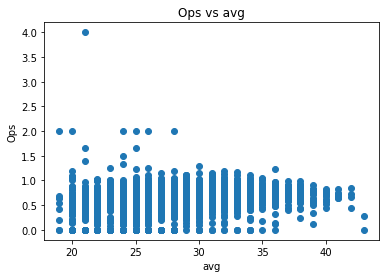

Ops와 avg 간의 상관 관계: 0.22


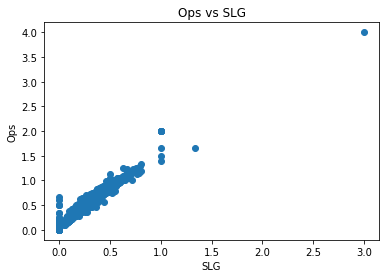

Ops와 SLG 간의 상관 관계: 0.97


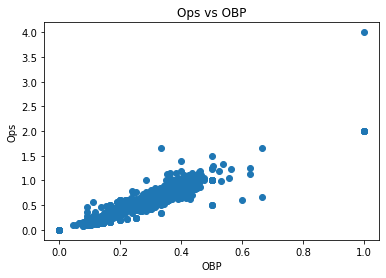

Ops와 OBP 간의 상관 관계: 0.94


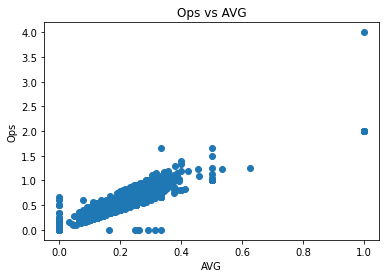

Ops와 AVG 간의 상관 관계: 0.92


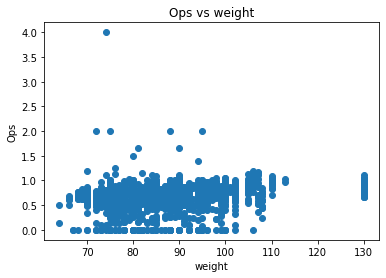

Ops와 weight 간의 상관 관계: 0.20


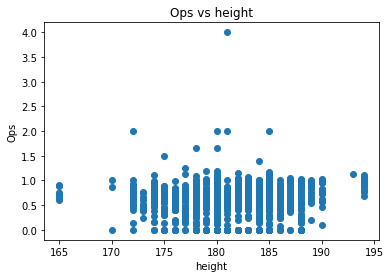

Ops와 height 간의 상관 관계: 0.10


In [36]:

correlation_ops_bmi = regular_season[['OPS', 'BMI']].corr().iloc[0, 1]
plt.scatter(regular_season['BMI'], regular_season['OPS'])
plt.title('Ops vs BMI')
plt.xlabel('BMI')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 BMI 간의 상관 관계: {correlation_ops_bmi:.2f}')

correlation_ops_age = regular_season[['OPS', 'age']].corr().iloc[0, 1]
plt.scatter(regular_season['age'], regular_season['OPS'])
plt.title('Ops vs avg')
plt.xlabel('avg')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 avg 간의 상관 관계: {correlation_ops_age:.2f}')


correlation_ops_slg = regular_season[['OPS', 'SLG']].corr().iloc[0, 1]
plt.scatter(regular_season['SLG'], regular_season['OPS'])
plt.title('Ops vs SLG')
plt.xlabel('SLG')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 SLG 간의 상관 관계: {correlation_ops_slg:.2f}')

correlation_ops_obp = regular_season[['OPS', 'OBP']].corr().iloc[0, 1]
plt.scatter(regular_season['OBP'], regular_season['OPS'])
plt.title('Ops vs OBP')
plt.xlabel('OBP')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 OBP 간의 상관 관계: {correlation_ops_obp:.2f}')

correlation_ops_avg = regular_season[['OPS', 'avg']].corr().iloc[0, 1]
plt.scatter(regular_season['avg'], regular_season['OPS'])
plt.title('Ops vs AVG')
plt.xlabel('AVG')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 AVG 간의 상관 관계: {correlation_ops_avg:.2f}')


correlation_ops_wei = regular_season[['OPS', 'weight']].corr().iloc[0, 1]
plt.scatter(regular_season['weight'], regular_season['OPS'])
plt.title('Ops vs weight')
plt.xlabel('weight')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 weight 간의 상관 관계: {correlation_ops_wei:.2f}')

correlation_ops_hei = regular_season[['OPS', 'height']].corr().iloc[0, 1]
plt.scatter(regular_season['height'], regular_season['OPS'])
plt.title('Ops vs height')
plt.xlabel('height')
plt.ylabel('Ops')
plt.show()
print(f'Ops와 height 간의 상관 관계: {correlation_ops_hei:.2f}')


In [14]:
regular_season = pd.read_csv("Regular_Season_Batter.csv")
regular_season['position'] = regular_season['position'].str.replace(r"\(.*\)","")
regular_season.loc[(regular_season['position'] == '내야수')]
regular_season.loc[(regular_season['position'] == '외야수')]
regular_season.loc[(regular_season['position'] == '포수')]
regular_season

C:\Users\cho\AppData\Local\Temp\ipykernel_21140\3094824837.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  regular_season['position'] = regular_season['position'].str.replace(r"\(.*\)","")


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수,석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수,석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수,석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수,석천초-대헌중-공주고,4000만원,0.761


In [15]:
# 'height/weight' 열을 '/'를 기준으로 나누고, 각각 'height'와 'weight' 열로 저장
regular_season[['height', 'weight']] = regular_season['height/weight'].str.split('/', expand=True)

# 'height'와 'weight' 열의 값을 숫자로 변환
regular_season['height'] = pd.to_numeric(regular_season['height'].str.extract('(\d+)')[0])
regular_season['weight'] = pd.to_numeric(regular_season['weight'].str.extract('(\d+)')[0])

# BMI 계산 및 소수 둘째 자리까지 반올림
regular_season['BMI'] = regular_season['weight'] / ((regular_season['height'] / 100) ** 2)
regular_season['BMI'] = regular_season['BMI'].round(1)

# 'year_born' 열을 날짜 형식으로 변환
regular_season['year_born'] = pd.to_datetime(regular_season['year_born'], format='%Y년 %m월 %d일')

# 'year'와 'year_born'을 사용하여 'age' 열 생성
regular_season['age'] = regular_season['year'] - regular_season['year_born'].dt.year + 1

regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,height,weight,BMI,age
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,177cm/93kg,1985-04-12,내야수,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,177.0,93.0,29.7,34
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.000,180.0,72.0,22.2,20
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.686,180.0,72.0,22.2,23
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.673,180.0,72.0,22.2,24
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,180cm/72kg,1992-08-11,내야수,광주대성초-광주동성중-광주동성고,10000만원,0.489,180.0,72.0,22.2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,181cm/82kg,1989-02-15,내야수,석천초-대헌중-공주고,4000만원,0.000,181.0,82.0,25.0,26
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,181cm/82kg,1989-02-15,내야수,석천초-대헌중-공주고,4000만원,0.000,181.0,82.0,25.0,27
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,181cm/82kg,1989-02-15,내야수,석천초-대헌중-공주고,4000만원,0.000,181.0,82.0,25.0,28
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,181cm/82kg,1989-02-15,내야수,석천초-대헌중-공주고,4000만원,0.761,181.0,82.0,25.0,29


In [8]:
pre_season['year'].value_counts()

2018    182
2017    167
2016    153
2015    134
2014    117
2013    104
2012     87
2011     75
2010     72
2009     66
2008     61
2007     43
2005     37
2006     36
2004     28
2003     19
2002     12
Name: year, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45349 (\N{HANGUL SYLLABLE NEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

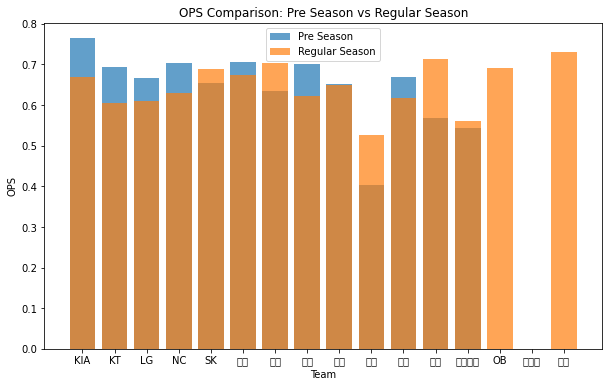

In [7]:
# 예시: 'pre_season' 데이터셋에서 OPS와 team 열을 선택
pre_season_ops = pre_season[['team', 'OPS']]

# 'regular_season' 데이터셋에서도 동일하게 수행
regular_season_ops = regular_season[['team', 'OPS']]

pre_season_pivot = pre_season_ops.pivot_table(index='team', values='OPS', aggfunc='mean')
regular_season_pivot = regular_season_ops.pivot_table(index='team', values='OPS', aggfunc='mean')

# 두 시즌의 OPS를 하나의 그래프에 비교하는 예시 (막대 그래프)
plt.figure(figsize=(10, 6))
plt.bar(pre_season_pivot.index, pre_season_pivot['OPS'], label='Pre Season', alpha=0.7)
plt.bar(regular_season_pivot.index, regular_season_pivot['OPS'], label='Regular Season', alpha=0.7)
plt.xlabel('Team')
plt.ylabel('OPS')
plt.title('OPS Comparison: Pre Season vs Regular Season')
plt.legend()
plt.show()


In [14]:
from scipy.stats import ttest_ind, levene, shapiro, mannwhitneyu

teams = ['두산', 'LG', 'SK', '롯데', '삼성', 'KIA', '한화', '넥센', 'NC', 'KT', '현대', '우리', '히어로즈']

pre_season = pre_season.dropna(subset=['OPS'])
regular_season = regular_season.dropna(subset=['OPS'])
#일단 결측치 다 제거

#독립(?)

for team in teams:
    pre_season_team_ops = pre_season[pre_season['team'] == team]['OPS']
    regular_season_team_ops = regular_season[regular_season['team'] == team]['OPS']

    
    _, pre_season_p_value = shapiro(pre_season_team_ops)  # pre_season 정규성
    _, regular_season_p_value = shapiro(regular_season_team_ops) # regular_season 정규성
    _, p_value_levene = levene(pre_season_team_ops, regular_season_team_ops) #  등분산성 

        # shapiro test 결과 정규성 만족하지 않음 -> levene 등분산성 검정 결과 등분산성 만족하지않음 

    statistic, p_value_mannwhitneyu = mannwhitneyu(pre_season_team_ops, regular_season_team_ops, alternative='two-sided') 
    #독립이라고 가정해서 mann-whitney u test를 사용 
    
    #p-value <0.05 일때 유의미한 차이를 보인다고 할 수 있음 
    print(f'Team: {team}')
    print(f"Pre-season OPS normality p-value: {pre_season_p_value:.4f}")
    print(f"Regular-season OPS normality p-value: {regular_season_p_value:.4f}")
    print(f'Levene\'s Test - P-Value: {p_value_levene:.4f}')
    print(f"Mann-Whitney U statistic: {statistic}")
    print(f"P-value for Mann-Whitney U test: {p_value_mannwhitneyu: .4f}")
    t_stat, p_value = ttest_ind(pre_season_team_ops, regular_season_team_ops, equal_var=False)
    print('-------------------------')
    


Team: 두산
Pre-season OPS normality p-value: 0.0000
Regular-season OPS normality p-value: 0.0000
Levene's Test - P-Value: 0.0003
Mann-Whitney U statistic: 21559.0
P-value for Mann-Whitney U test:  0.0029
-------------------------
Team: LG
Pre-season OPS normality p-value: 0.0272
Regular-season OPS normality p-value: 0.0000
Levene's Test - P-Value: 0.0003
Mann-Whitney U statistic: 27473.5
P-value for Mann-Whitney U test:  0.0552
-------------------------
Team: SK
Pre-season OPS normality p-value: 0.0090
Regular-season OPS normality p-value: 0.0000
Levene's Test - P-Value: 0.0000
Mann-Whitney U statistic: 18432.0
P-value for Mann-Whitney U test:  0.0719
-------------------------
Team: 롯데
Pre-season OPS normality p-value: 0.0000
Regular-season OPS normality p-value: 0.0000
Levene's Test - P-Value: 0.0001
Mann-Whitney U statistic: 25918.5
P-value for Mann-Whitney U test:  0.0725
-------------------------
Team: 삼성
Pre-season OPS normality p-value: 0.0000
Regular-season OPS normality p-value: 

In [16]:
from scipy.stats import ttest_ind, levene, shapiro, wilcoxon

teams = ['두산', 'LG', 'SK', '롯데', '삼성', 'KIA', '한화', '넥센', 'NC', 'KT', '현대', '우리', '히어로즈']

pre_season = pre_season.dropna(subset=['OPS'])
regular_season = regular_season.dropna(subset=['OPS'])
#결측치 다 제거
#독립x

for team in teams:
    pre_season_team_ops = pre_season[pre_season['team'] == team]['OPS']
    regular_season_team_ops = regular_season[regular_season['team'] == team]['OPS']

    _, pre_season_p_value = shapiro(pre_season_team_ops)  # pre_season 정규성
    _, regular_season_p_value = shapiro(regular_season_team_ops) # regular_season 정규성
    _, p_value_levene = levene(pre_season_team_ops, regular_season_team_ops) # 등분산성 
    # 정규성 만족하지 않음 -> levene 등분산성 검정 사용 -> 

    
    statistic, p_value_wilcoxon = wilcoxon(pre_season_team_ops, regular_season_team_ops, alternative='two-sided') 
    #독립이아니라 wilcoxon rank sum test를 사용
    # pre_season_team_ops과 regular_season_team_ops의 데이터 갯수가 달라서 오류발생 

    print(f'Team: {team}')
    print(f"Pre-season OPS normality p-value: {pre_season_p_value:.4f}")
    print(f"Regular-season OPS normality p-value: {regular_season_p_value:.4f}")
    print(f'Levene\'s Test - P-Value: {p_value_levene:.4f}')
    
    print(f"Wilcoxon statistic: {statistic}")
    print(f"P-value for Wilcoxon rank-sum test: {p_value_wilcoxon}")
    t_stat, p_value = ttest_ind(pre_season_team_ops, regular_season_team_ops, equal_var=False)

    print('-------------------------')

ValueError: The samples x and y must have the same length.

In [15]:
pre_season['team'].value_counts() 
# 우리(2008) = 히어로즈(2009) = 넥센(2010~)
# 현대(1995-2007) -> 제외?

team
두산      186
LG      174
SK      169
롯데      166
삼성      149
KIA     132
한화      131
넥센      112
NC       88
KT       57
현대       18
우리        6
히어로즈      5
Name: count, dtype: int64

In [20]:
현대_pre = pre_season[pre_season['team'] == '현대']
현대_pre['year'].value_counts()

year
2005    5
2006    4
2007    4
2003    3
2004    2
Name: count, dtype: int64

In [21]:
우리_pre = pre_season[pre_season['team'] == '우리']
우리_pre['year'].value_counts()

year
2008    6
Name: count, dtype: int64

In [22]:
히어로즈_pre = pre_season[pre_season['team'] == '히어로즈']
히어로즈_pre['year'].value_counts()

year
2009    5
Name: count, dtype: int64

In [34]:
넥센_pre = pre_season[pre_season['team'] == '넥센']
넥센_pre['year'].value_counts()

year
2016    17
2017    16
2015    16
2018    14
2014    14
2013    12
2012     9
2011     8
2010     6
Name: count, dtype: int64

In [37]:
pre_season.replace({'team':'우리'}, '넥센')
pre_season.replace({'team':'히어로즈'}, '넥센')
regular_season.replace({'team':'우리'}, '넥센')
regular_season.replace({'team':'히어로즈'}, '넥센')

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [38]:
넥센_pre = pre_season[pre_season['team'] == '넥센']
넥센_pre['year'].value_counts()

year
2016    17
2017    16
2015    16
2018    14
2014    14
2013    12
2012     9
2011     8
2010     6
Name: count, dtype: int64

In [20]:
# team 별로 묶기

LG_pre = pre_season[pre_season['team'] == 'LG']
LG_regular = regular_season[regular_season['team'] == 'LG']

SK_pre = pre_season[pre_season['team'] == 'SK']
SK_regular = regular_season[regular_season['team'] == 'SK']

LT_pre = pre_season[pre_season['team'] == '롯데']
LT_regular = regular_season[regular_season['team'] == '롯데']

SS_pre = pre_season[pre_season['team'] == '삼성']
SS_regular = regular_season[regular_season['team'] == '삼성']

KIA_pre = pre_season[pre_season['team'] == 'KIA']
KIA_regular = regular_season[regular_season['team'] == 'KIA']

HH_pre = pre_season[pre_season['team'] == '한화']
HH_regular = regular_season[regular_season['team'] == '한화']

NX_pre = pre_season[pre_season['team'] == '넥센']
NX_regular = regular_season[regular_season['team'] == '넥센']

NC_pre = pre_season[pre_season['team'] == 'NC']
NC_regular = regular_season[regular_season['team'] == 'NC']

KT_pre = pre_season[pre_season['team'] == 'KT']
KT_regular = regular_season[regular_season['team'] == 'KT']

In [42]:
correlation_ops_age = pre_season[['OPS', 'age']].corr()
print(correlation_ops_age)

          OPS       age
OPS  1.000000  0.109257
age  0.109257  1.000000


In [40]:
NX_regular

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
66,6,강병식,2010,넥센,0.287,107,251,32,72,9,...,5,0.438247,0.395270,0,NaN,1977년 04월 23일,NaN,성동초-신일중-신일고-고려대-상무-현대-우리-히어로즈-넥센,NaN,0.833517
67,6,강병식,2011,넥센,0.174,77,167,16,29,8,...,3,0.269461,0.250000,0,NaN,1977년 04월 23일,NaN,성동초-신일중-신일고-고려대-상무-현대-우리-히어로즈-넥센,NaN,0.519461
68,6,강병식,2012,넥센,0.200,26,30,4,6,2,...,0,0.266667,0.333333,0,NaN,1977년 04월 23일,NaN,성동초-신일중-신일고-고려대-상무-현대-우리-히어로즈-넥센,NaN,0.600000
93,10,강정호,2010,넥센,0.301,133,449,60,135,30,...,14,0.456570,0.392650,23,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.849220
94,10,강정호,2011,넥센,0.282,123,444,53,125,22,...,12,0.400901,0.356855,13,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.757756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,303,최경철,2012,넥센,0.223,81,130,9,29,3,...,0,0.261538,0.262774,3,NaN,1980년 08월 15일,NaN,효자초-전주동중-전주고-동의대-SK-상무-SK-넥센-LG,NaN,0.524312
2374,332,허도환,2011,넥센,0.223,79,166,13,37,6,...,6,0.271000,0.275000,6,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.546000
2375,332,허도환,2012,넥센,0.195,94,210,11,41,11,...,5,0.262000,0.272000,5,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.534000
2376,332,허도환,2013,넥센,0.215,116,260,29,56,12,...,7,0.281000,0.327000,8,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.608000


F_onewayResult(statistic=nan, pvalue=nan)
nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
